# Cross section, approximations w/ scattering length

https://physics.stackexchange.com/questions/708275/s-matrix-and-relation-to-phase-shifts
https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Quantum_Mechanics_(Fowler)/10%3A_Scattering_Theory/10.02%3A_More_Scattering_Theory_-_Partial_Waves
https://galileo.phys.virginia.edu/classes/752.mf1i.spring03/Scattering_III.htm
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://intra.ece.ucr.edu/~korotkov/courses/EE201/EE201-slides/EE201-Lec-6.pdf


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
h = 6.62607015e-34 #Planck's constant in Js
hbar = h/(2*np.pi) #reduced Planck's constant
m = 9.11e-28 #electron mass in kg
a = 1e-7 # 100nm
s = 1000000 #iterator number where neccessary
j = cmath.sqrt(-1)

In [3]:
Vo = -1000*1.4e-29
E = np.linspace(1.4e-29, 0.95*abs(Vo)) # ~1uK

k = np.sqrt((2*m*E)/hbar**2)
K = np.sqrt((2*m*(E-Vo))/hbar**2)
Ko = np.sqrt((2*m*-Vo)/hbar**2)

delta = np.arctan((k/K)*np.tan(K*a)) - k*a 
sigma = (np.pi/k**2)*((np.sin(delta))**2)

a_s = (a - (np.tan(a*Ko)/Ko))
delta_approx = -(a_s*k)
sigma_approx = np.pi*(a_s**2)

#plt.plot(E, delta/np.pi, color = 'blue', label = f'$\\delta$/$\\pi$')
#plt.plot(E, delta_approx, color = 'red', linestyle = 'dashed', label = f'$\\delta$ approx.')
#plt.legend()

print(max(sigma) - min(sigma))
print(sigma_approx)

3.5059741381012405e-13
4.3321011322642255e-13


In [4]:
m = 1.42e-25 #not electron mass in kg
r = 248e-12 # 100nm
e = 1.6e-19
a = r
Z = 37
eps = 8.85e-12

Vo = -(Z*e**2)/(4*np.pi*eps*r)

E = np.linspace(1.4e-29, 0.95*abs(Vo)) # ~1uK

k = np.sqrt((2*m*E)/hbar**2)
K = np.sqrt((2*m*(E-Vo))/hbar**2)
Ko = np.sqrt((2*m*-Vo)/hbar**2)

#print(f' k = {max(k)/min(k)}')
delta = np.arctan((k/K)*np.tan(K*a)) - k*a
sigma = (np.pi/k**2)*((np.sin(delta))**2)

a_s = (a - (np.tan(a*Ko)/Ko))
delta_approx = -(a_s*k)
sigma_approx = np.pi*(a_s**2)

print(f' a*Ko = {a*Ko}')
print(f' tan(a*Ko)/a*Ko = {np.tan(a*Ko)/(a*Ko)}')
print(f' tan is = {(np.tan(a*Ko)/Ko)}')
print(f' a_s = {a_s}')
print(f' min of k = {min(k)}, max of k = {max(k)}')

#plt.hlines(sigma_approx/1e-28, min(E)/1e-29, max(E)/1e-29, color = 'black', linestyle = 'dashed', label = f"$\\sigma$ approx.")
#plt.loglog(E/1e-29, sigma/1e-28, color = 'red', label = f"$\\sigma$")
#plt.legend()
#plt.ylabel('cross section (barns)')
#plt.xlabel(f'particle energy ($\\mu$K)')

print(f' sigma max = {max(sigma)} m^-2, sigma min = {min(sigma)} m^-2')
print(f' sigma max / sigma min = {max(sigma)/min(sigma)}')

 a*Ko = 7344.34596514112
 tan(a*Ko)/a*Ko = -0.00011414145637791627
 tan is = -2.8307081181723238e-14
 a_s = 2.4802830708118174e-10
 min of k = 18908062.395873476, max of k = 28864447467483.062
 sigma max = 1.9326320916723168e-19 m^-2, sigma min = 4.261050391174256e-31 m^-2
 sigma max / sigma min = 453557671055.7802


 a*Ko = 16.077359527924212
 tan(a*Ko)/a*Ko = 0.024081613534923375
 tan is = 4.4069352768909785e-09
 a_s = 1.7859306472310902e-07
 min of k = 2050506.2160210696, max of k = 85629899.95968972
 sigma max = 9.574522557958332e-14 m^-2, sigma min = 1.286608959534017e-18 m^-2
 sigma max / sigma min = 74416.725353957


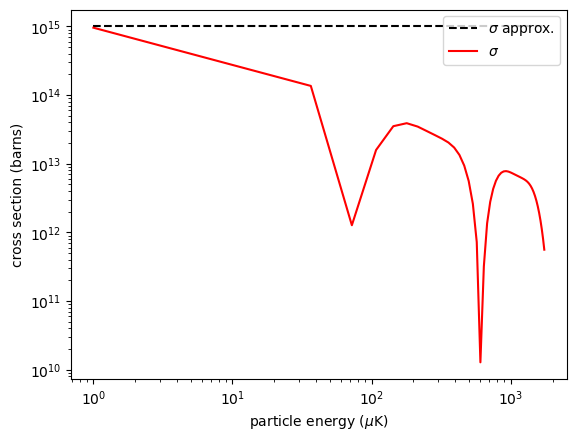

In [5]:
m = 1.67e-27 # hydrogen mass in kg
a = 1.83e-7 # 183nm

Vo = -1000*2.57e-29
E = np.linspace(1.4e-29, 0.95*abs(Vo)) # ~1uK

k = np.sqrt((2*m*E)/hbar**2)
K = np.sqrt((2*m*(E-Vo))/hbar**2)
Ko = np.sqrt((2*m*-Vo)/hbar**2)

#print(f' k = {max(k)/min(k)}')
delta = np.arctan((k/K)*np.tan(K*a)) - k*a
sigma = (np.pi/k**2)*((np.sin(delta))**2)

a_s = (a - (np.tan(a*Ko)/Ko))
delta_approx = -(a_s*k)
sigma_approx = np.pi*(a_s**2)

print(f' a*Ko = {a*Ko}')
print(f' tan(a*Ko)/a*Ko = {np.tan(a*Ko)/(a*Ko)}')
print(f' tan is = {(np.tan(a*Ko)/Ko)}')
print(f' a_s = {a_s}')
print(f' min of k = {min(k)}, max of k = {max(k)}')

plt.hlines(sigma_approx/1e-28, min(E)/1.4e-29, max(E)/1.4e-29, color = 'black', linestyle = 'dashed', label = f"$\\sigma$ approx.")
plt.loglog(E/1.4e-29, sigma/1e-28, color = 'red', label = f"$\\sigma$")
plt.legend()
plt.ylabel('cross section (barns)')
plt.xlabel(f'particle energy ($\\mu$K)')

print(f' sigma max = {max(sigma)} m^-2, sigma min = {min(sigma)} m^-2')
print(f' sigma max / sigma min = {max(sigma)/min(sigma)}')

 Emax = 1.33e-24
sigma approx = 622408428403.3191 barns
 a*Ko = 23.917017324616197
 tan(a*Ko)/a*Ko = -0.11276332839943012
 tan is = -4.510533135977205e-10
 a_s = 4.451053313597721e-09
 min of k = 18908062.395873476, max of k = 5827856230.106679
6.208905899986551e-17
6.224084284033191e-17


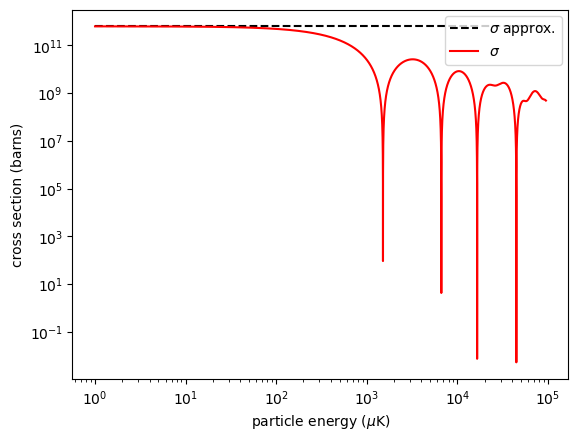

In [6]:
m = 1.42e-25 # ~Rubidium mass in kg
a = 40e-10 # 40A

Vo = -1e5*1.4e-29 # 1 million X ~1uK

E = np.linspace(1.4e-29, 0.95*abs(Vo),s) 
print(f' Emax = {max(E)}')



k = np.sqrt((2*m*E)/hbar**2)
K = np.sqrt((2*m*(E-Vo))/hbar**2)
Ko = np.sqrt((2*m*-Vo)/hbar**2)

#print(f' k = {max(k)/min(k)}')
delta = np.arctan((k/K)*np.tan(K*a)) - k*a
sigma = (np.pi/k**2)*((np.sin(delta))**2)

a_s = (a - (np.tan(a*Ko)/Ko))
delta_approx = -(a_s*k)
sigma_approx = np.pi*(a_s**2)

print(f'sigma approx = {sigma_approx/1e-28} barns')

print(f' a*Ko = {a*Ko}')
print(f' tan(a*Ko)/a*Ko = {np.tan(a*Ko)/(a*Ko)}')
print(f' tan is = {(np.tan(a*Ko)/Ko)}')
print(f' a_s = {a_s}')
print(f' min of k = {min(k)}, max of k = {max(k)}')

plt.hlines(sigma_approx/1e-28, min(E)/1.4e-29, max(E)/1.4e-29, color = 'black', linestyle = 'dashed', label = f"$\\sigma$ approx.")
plt.loglog(E/1.4e-29, sigma/1e-28, color = 'red', label = f"$\\sigma$")
plt.legend()
plt.xlabel(f'particle energy ($\\mu$K)')
plt.ylabel(f'cross section (barns)')

print(max(sigma) - min(sigma))
print(sigma_approx)

 Emax = 1.33e-23
sigma approx = 499491067237.1512 barns
 a*Ko = 75.6322495834939
 tan(a*Ko)/a*Ko = 0.003152015218475854
 tan is = 1.2608060873903417e-11
 a_s = 3.987391939126097e-09
 min of k = 18908062.395873476, max of k = 18429299563.13946
4.9854485036690986e-17
4.994910672371512e-17


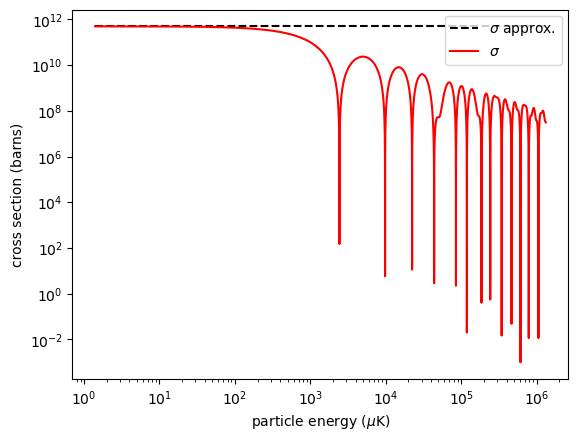

In [7]:
m = 1.42e-25 # ~Cesium mass in kg
a = 40e-10 # 40A

Vo = -1e6*1.4e-29 # 1000 X ~1uK

E = np.linspace(1.4e-29, 0.95*abs(Vo),s) 
print(f' Emax = {max(E)}')



k = np.sqrt((2*m*E)/hbar**2)
K = np.sqrt((2*m*(E-Vo))/hbar**2)
Ko = np.sqrt((2*m*-Vo)/hbar**2)

#print(f' k = {max(k)/min(k)}')
delta = np.arctan((k/K)*np.tan(K*a)) - k*a
sigma = (np.pi/k**2)*((np.sin(delta))**2)

a_s = (a - (np.tan(a*Ko)/Ko))
delta_approx = -(a_s*k)
sigma_approx = np.pi*(a_s**2)

print(f'sigma approx = {sigma_approx/1e-28} barns')

print(f' a*Ko = {a*Ko}')
print(f' tan(a*Ko)/a*Ko = {np.tan(a*Ko)/(a*Ko)}')
print(f' tan is = {(np.tan(a*Ko)/Ko)}')
print(f' a_s = {a_s}')
print(f' min of k = {min(k)}, max of k = {max(k)}')

plt.hlines(sigma_approx/1e-28, min(E)/1e-29, max(E)/1e-29, color = 'black', linestyle = 'dashed', label = f"$\\sigma$ approx.")
plt.loglog(E/1e-29, sigma/1e-28, color = 'red', label = f"$\\sigma$")
plt.legend()
plt.xlabel(f'particle energy ($\\mu$K)')
plt.ylabel(f'cross section (barns)')

print(max(sigma) - min(sigma))
print(sigma_approx)

1.0


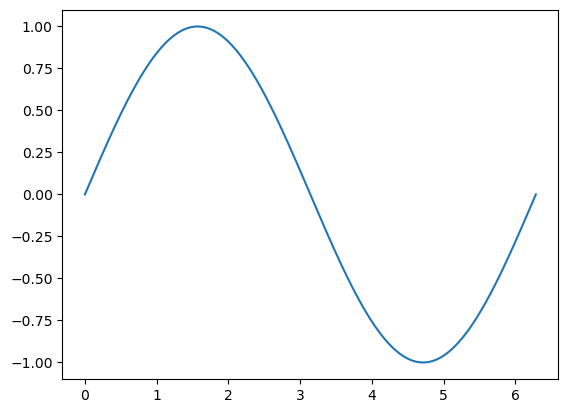

In [8]:
x = np.linspace(0,2*np.pi,3221)
y = np.sin(x)
plt.plot(x,y)
print(max(y))